# The Decision Tree Algorithm 

## 1. Import packages and setup environment

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.impute import SimpleImputer as SI
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.impute import SimpleImputer as SI
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## 2. Data uploading and preprocessing

Upload the training and testing data from .csv files

In [2]:
data = pd.read_csv('new_data.csv')
Test = pd.read_csv("test_set.csv")

Then, remove features that are irrelevent to the game result and normalize the remaining attributes' values 

In [3]:
SI = SI()
scaler = MMS(feature_range=(0,1))
X = data.drop(['gameId','seasonId','creationTime','winner'],axis=1).values#delete the meaningless features
X = SI.fit_transform(X)
X = scaler.fit_transform(X)
X_test = Test.drop(['gameId','seasonId','creationTime','winner'],axis=1).values
X_test = SI.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)
y = data['winner'] - 1# extract the standard training result
y_test = Test["winner"] - 1


## 3. Model training and timing

Setup DT models with different depths and use the original data to train them 

In [4]:
record_time = []
accuracies = []
for dpt in range(1,22):
    time_1 = time.time()
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=dpt)#total depth 21
    clf = clf.fit(X,y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)
    time_2 = time.time()
    diff_time = time_2 - time_1
    record_time.append(diff_time)

## 4. Results visualizing

Visualize the entire DT and find out it is too large and complex

In [5]:
print("Accuracy:",accuracies[20])

Accuracy: 0.9622073253667541


In [6]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('LOL.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.768007 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.768007 to fit



Plot the n-time figure to visualize the training time cost at each depth

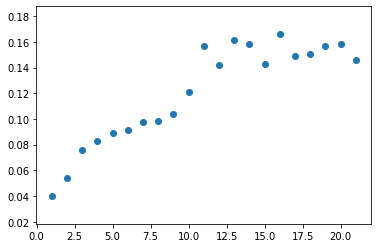

In [7]:
plt.scatter(range(1,22),record_time[:])

Plot the n-accuracy figure to visualize the training accuracy at each depth

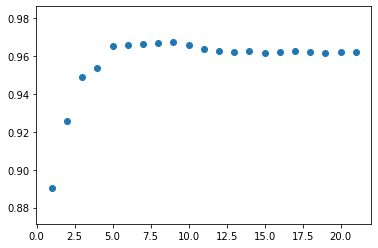

In [8]:
plt.scatter(range(1,22),accuracies[:])

## 5. Optimization

Normalize the time and accuracy values

In [9]:
accuracy_normal = accuracies[1:9]
time_normal = record_time[1:9]
sum_accu_normal = sum(accuracy_normal)
sum_time_normal = sum(time_normal)
for i in range(8):
    accuracy_normal[i] /= sum_accu_normal
    time_normal[i] /= sum_time_normal

Plot the normalized figure

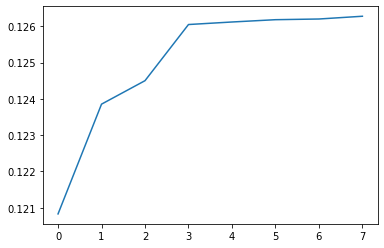

In [10]:
plt.plot(range(8),accuracy_normal[:])

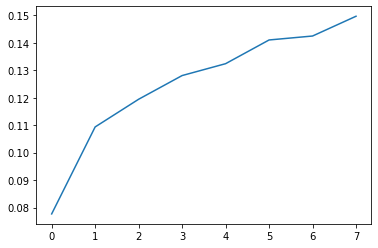

In [11]:
plt.plot(range(8),time_normal[:])

Combine the accuracy and timecost attributes to determine the optimal solution

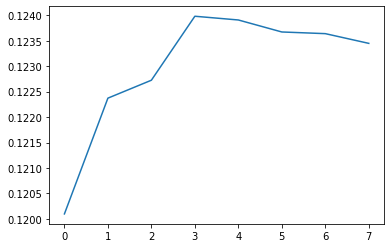

In [12]:
rate = []
for i in range(8):
    rate.append(accuracy_normal[i]*(1-time_normal[i]*time_normal[i]))
plt.plot(range(8),rate[:])

## 6. Prediction result

Plot the optimal DT

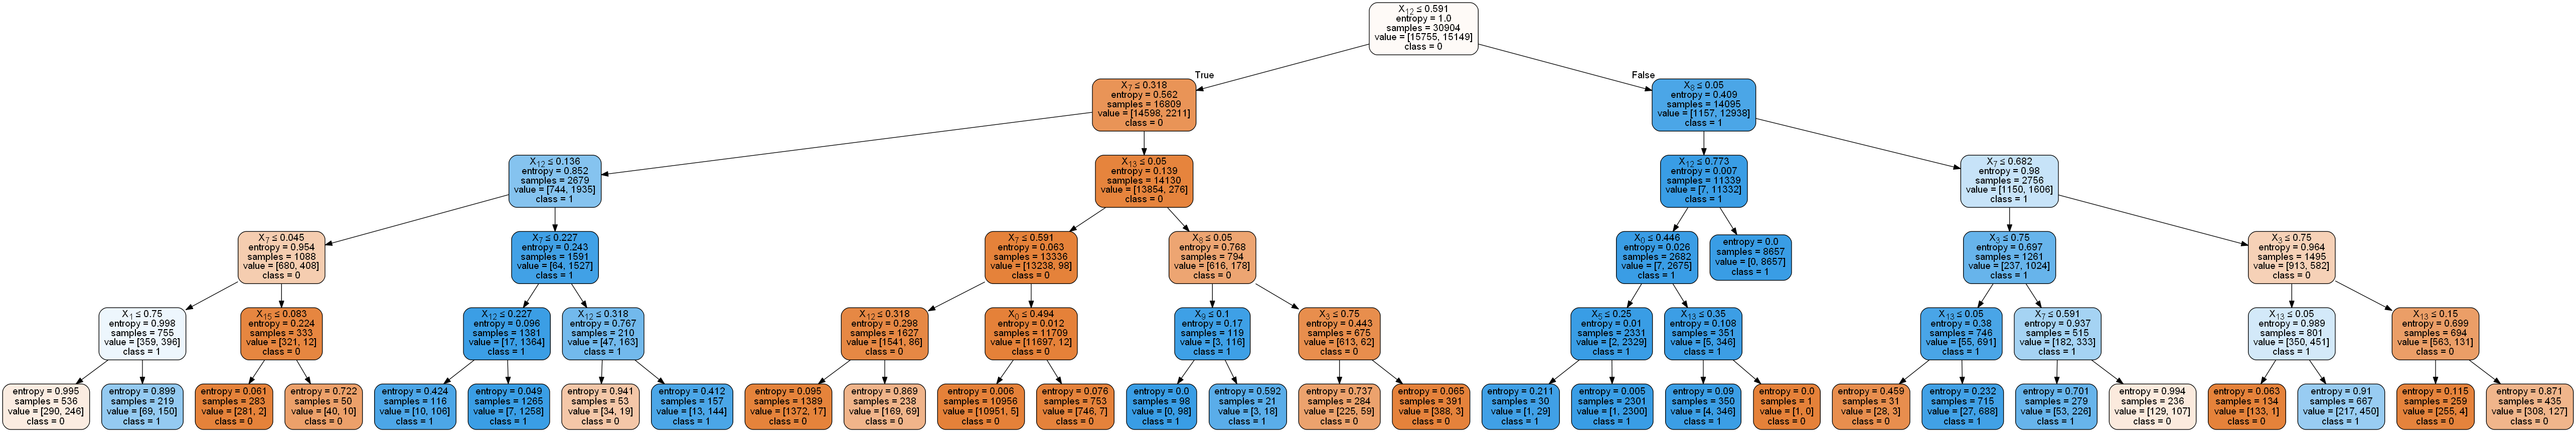

In [13]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)#total depth 21
clf = clf.fit(X,y)
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('LOL.png')
Image(graph.create_png())

In [14]:
print(f'''The optimal depth of decision tree is 5
With the accuracy is {accuracies[4]} and training time is {record_time[4]}''')

The optimal depth of decision tree is 5
With the accuracy is 0.9655591178470806 and training time is 0.08875918388366699
